# **Line, Circle and Blob Detection**

**In this lesson we'll learn:**
1. Houghlines
2. Probabilistic Houghlines
3. Hough Circles
4. Blob Detection

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow( image = None, title="", size = 10):
    w, h = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



## **Line Detection - Using Hough Lines**
   
The Hough transform takes a binary edge map as input and attempts to locate edges placed as straight lines. The idea of the Hough transform is, that every edge point in the edge map is transformed to all possible lines that could pass through that point.

`cv2.HoughLines(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)`
- Threshold here is the minimum vote for it to be considered a line


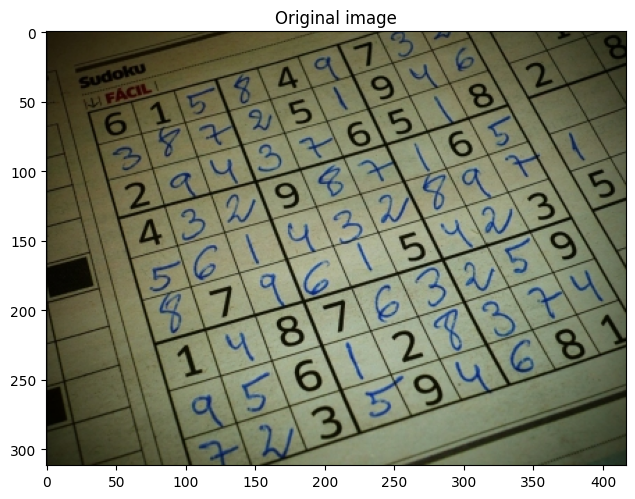

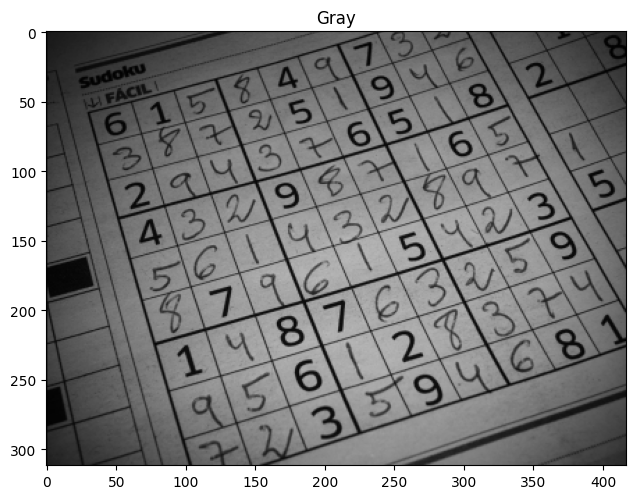

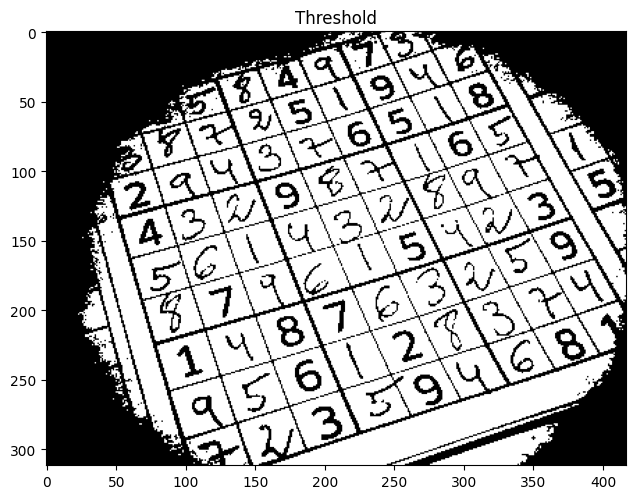

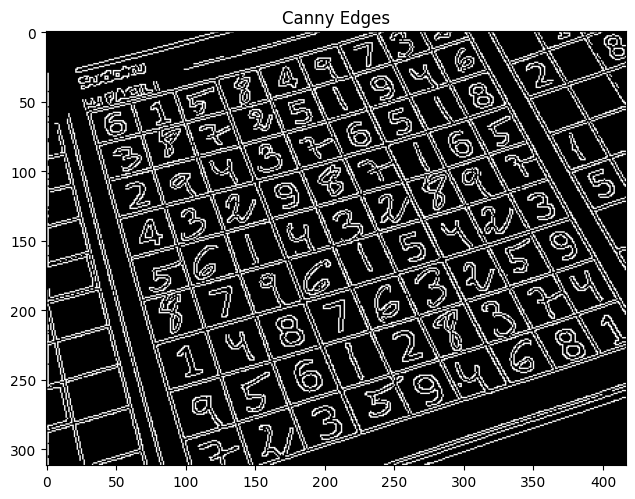

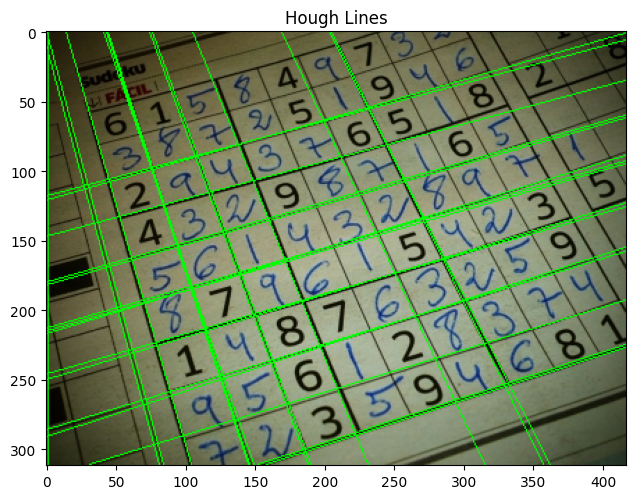

In [2]:
# Load our image
image= cv2.imread('images/sudoku.jpg')
imshow(image, 'Original image')

# Grayscale and Canny Edges extracted
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh= cv2.threshold(gray, 100, 255, 0)
edges= cv2.Canny(gray, 100, 170)

imshow(gray, 'Gray')
imshow(thresh, 'Threshold')
imshow(edges, 'Canny Edges')

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 170 (number of points on line)
lines= cv2.HoughLines(edges, 1, np.pi/180, 170)

# We iterate through each line and convert it to the format required by cv2.lines (i.e. requiring end points)
for line in lines:
    rho, theta= line[0]
    a= np.cos(theta)
    b= np.sin(theta)
    x0= a * rho
    y0= b * rho
    x1 = int( x0 + 1000 * (-b) )
    y1 = int( y0 + 1000 * (a) )
    x2 = int( x0 - 1000 * (-b) )
    y2 = int( y0 - 1000 * (a) )
    cv2.line(image, (x1, y1), (x2, y2), (0,255,0), 1)

imshow(image, 'Hough Lines')

In [3]:
gray.shape

(312, 417)

In [4]:
type(lines), lines.dtype, lines.shape

(numpy.ndarray, dtype('float32'), (28, 1, 2))

In [5]:
lines[-1]

array([[-39.       ,   2.8099802]], dtype=float32)

In [6]:
rho, theta

(np.float32(-39.0), np.float32(2.8099802))

In [7]:
line.shape, line

((1, 2), array([[-39.       ,   2.8099802]], dtype=float32))

In [8]:
a,b= line[0]
a, b

(np.float32(-39.0), np.float32(2.8099802))

## **Probabilistic Hough Lines**
A Hough Transform is considered probabilistic if it uses random sampling of the edge points. These algorithms can be divided based on how they map image space to parameter space.

```cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)```


Hough Lines shape:  (23, 1, 4)


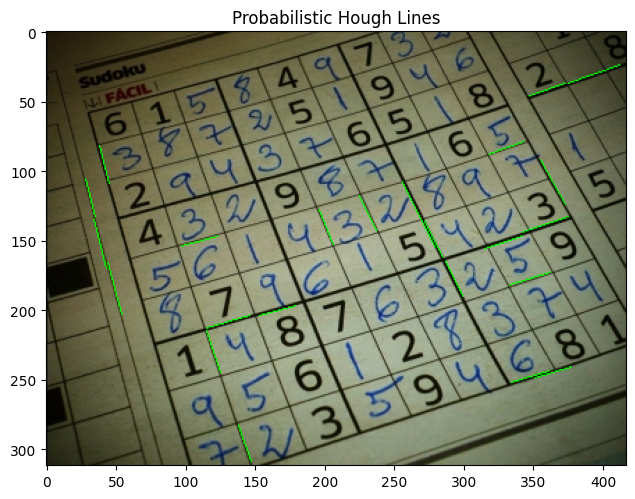

In [9]:
# Load our image
image= cv2.imread('images/sudoku.jpg')
#imshow(image, 'Original image')

# Grayscale and Canny Edges extracted
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges= cv2.Canny(gray, 100, 170)

# Again we use the same rho and theta accuracies
# However, we specifiy a minimum vote (pts along line) of 100
# and Min line length of 3 pixels and max gap between lines of 25 pixels
lines= cv2.HoughLinesP(edges, 1, np.pi/180, 100, 3, 25)
print('Hough Lines shape: ',lines.shape)

for x in lines:
    for x1, y1, x2, y2 in x:
        cv2.line(image, (x1, y1), (x2, y2), (0,255,0), 1)
        
imshow(image, 'Probabilistic Hough Lines')

In [10]:
lines.shape, lines[0]

((23, 1, 4), array([[334, 252, 361, 244]], dtype=int32))

## **Circle Detection - Hough Cirlces**

`cv2.HoughCircles(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)`


- Method - currently only cv2.HOUGH_GRADIENT available
- dp - Inverse ratio of accumulator resolution
- MinDist - the minimum distance between the center of detected circles
- param1 - Gradient value used in the edge detection
- param2 - Accumulator threshold for the HOUGH_GRADIENT method (lower allows more circles to be detected (false positives))
- minRadius - limits the smallest circle to this size (via radius)
- MaxRadius - similarly sets the limit for the largest circles


In [11]:
#!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Circles_Packed_In_Square_11.jpeg
#!mv Circles_Packed_In_Square_11.jpeg images/circles.jpg

--2024-11-13 21:20:20--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Circles_Packed_In_Square_11.jpeg
Connecting to 127.0.0.1:12334... connected.
Proxy request sent, awaiting response... 200 OK
Length: 82585 (81K) [image/jpeg]
Saving to: ‘Circles_Packed_In_Square_11.jpeg’

Circles_Packed_In_S 100%[===================>]  80.65K  31.6KB/s    in 30s     

2024-11-13 21:20:50 (2.73 KB/s) - ‘Circles_Packed_In_Square_11.jpeg’ saved [82585/82585]



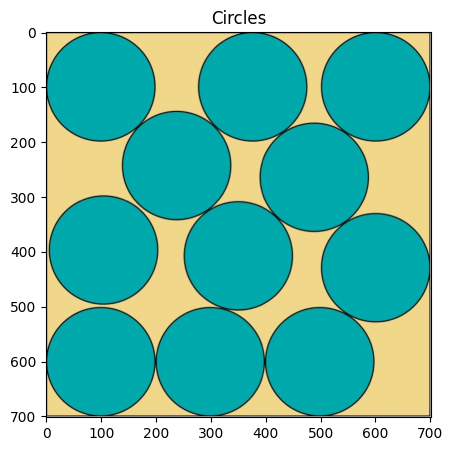

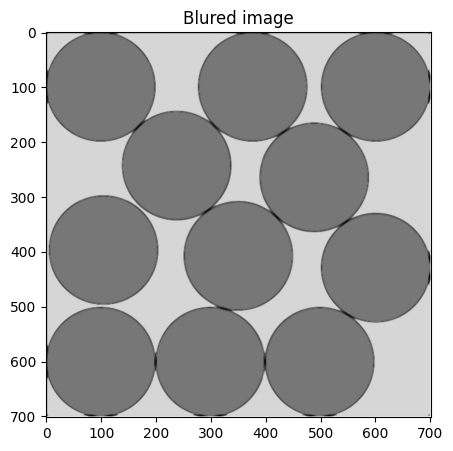

Circles shape:  (1, 11, 3)


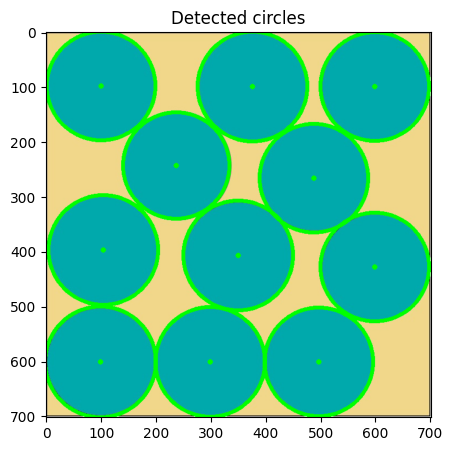

In [12]:
image= cv2.imread('images/circles.jpg')
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(image, 'Circles', 5)

blur= cv2.medianBlur(gray, 5)
imshow(blur, 'Blured image', 5)

circles= cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 100)
print('Circles shape: ', circles.shape)

circles= np.uint16(np.around(circles))

for i in circles[0]:
    # draw the outer circle
    cv2.circle(image, (i[0], i[1]), i[2], (0,255,0), 5)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0,255,0), 5)
    
imshow(image, 'Detected circles', 5)

In [13]:
blur.shape

(702, 702)

In [14]:
circles.shape, circles[0,0]

((1, 11, 3), array([299, 601, 100], dtype=uint16))

In [15]:
circles[:,:,2]

array([[100, 100, 100, 100,  99, 101,  99,  99,  97,  99,  99]],
      dtype=uint16)

In [16]:
circles[0,0]

array([299, 601, 100], dtype=uint16)

In [17]:
round(circles[0,0,0])

299

In [18]:
np.round(circles[0,0,0])

np.uint16(299)

In [19]:
np.around(circles[0,0,0])

np.uint16(299)

## **Blob Detection**

The function `cv2.drawKeypoints` takes the following arguments:

`cv2.drawKeypoints(input image, keypoints, blank_output_array, color, flags)`

flags:
- cv2.DRAW_MATCHES_FLAGS_DEFAULT
- cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
- cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
- cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

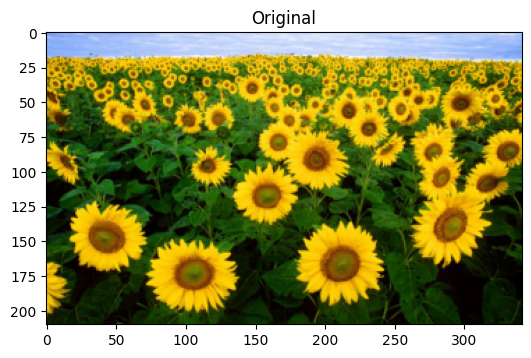

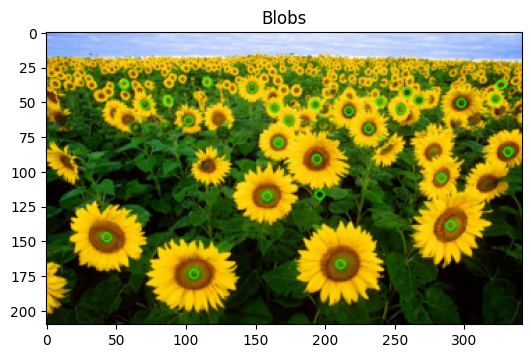

In [30]:
# Load image
image= cv2.imread('images/sunflowers.png')
imshow(image, 'Original')

# Set up the detector with default parameters.
detector= cv2.SimpleBlobDetector_create()

# Detect blobs.
keypoints= detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
blank= np.zeros((1,1))
blobs= cv2.drawKeypoints(image, keypoints, blank, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Show keypoints
imshow(blobs, 'Blobs')

In [31]:
blank

array([[0.]])

In [32]:
detector

< cv2.SimpleBlobDetector 0x76b9540cd9f0>

In [33]:
len(keypoints), keypoints[0]

(28, < cv2.KeyPoint 0x76b9615acb40>)

In [35]:
blobs.shape

(210, 342, 3)

In [36]:
image.shape

(210, 342, 3)